In [24]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
#Lectura de csv
df = pd.read_csv("../../data/df_te.csv")
df.sample(5)

,Precio,Tipo de Propiedad,Exterior,Habitaciones,Baños,Provincia,Mostrar Dirección,Tiene Video,Tiene Plano,Tiene 360,Ascensor,Tamaño_robust,Distancia_robust
351,695.0,681.418301,686.923794,689.131332,685.558824,697.296774,688.751480,678.348548,677.895197,675.286765,679.870971,0.100000,0.065867
350,700.0,681.418301,681.494810,689.131332,685.558824,697.296774,688.751480,678.348548,677.895197,675.286765,679.870971,0.533333,0.711662
277,750.0,681.418301,681.494810,683.142537,685.558824,697.296774,680.507463,678.348548,677.895197,675.286765,684.527919,0.933333,-0.046447
34,750.0,681.418301,681.494810,689.131332,685.558824,697.296774,688.751480,678.348548,677.895197,675.286765,684.527919,0.366667,0.641290
229,750.0,689.034696,681.494810,689.034696,685.558824,697.296774,680.507463,691.440441,677.895197,675.286765,684.527919,-1.200000,-0.520350


In [26]:
# Creacion de x (variables explicativas) e y (variable respuesta)
x=df.drop("Precio",axis=1)
y=df[["Precio"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [27]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Configurar el GridSearch
model_GradientBoostingRegressor = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  # Validación cruzada más robusta
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

model_GradientBoostingRegressor.fit(x_train, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\alexc\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
y_train_pred=model_GradientBoostingRegressor.predict(x_train)
y_test_pred=model_GradientBoostingRegressor.predict(x_test)

In [29]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.776900,28.265500,1307.379800,36.157700,11.285000
Test,0.404800,41.876800,2826.175600,53.161800,11.285000
Diferenceia Train-Test,0.372100,-13.611300,-1518.795800,-17.004100,0.000000
Porcentaje diferencia (%),91.921900,-48.155200,-116.171000,-47.027600,0.000000
Media,683.535700,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.086440,5.130844,302.365729,6.533638,1.650974
Influencia dif media (%),0.054400,1.991300,222.197000,2.487700,0.000000
Mediana,710.000000,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.083218,4.939599,291.095451,6.290106,1.589437
Influencia dif mediana (%),0.052400,1.917100,213.914900,2.394900,0.000000


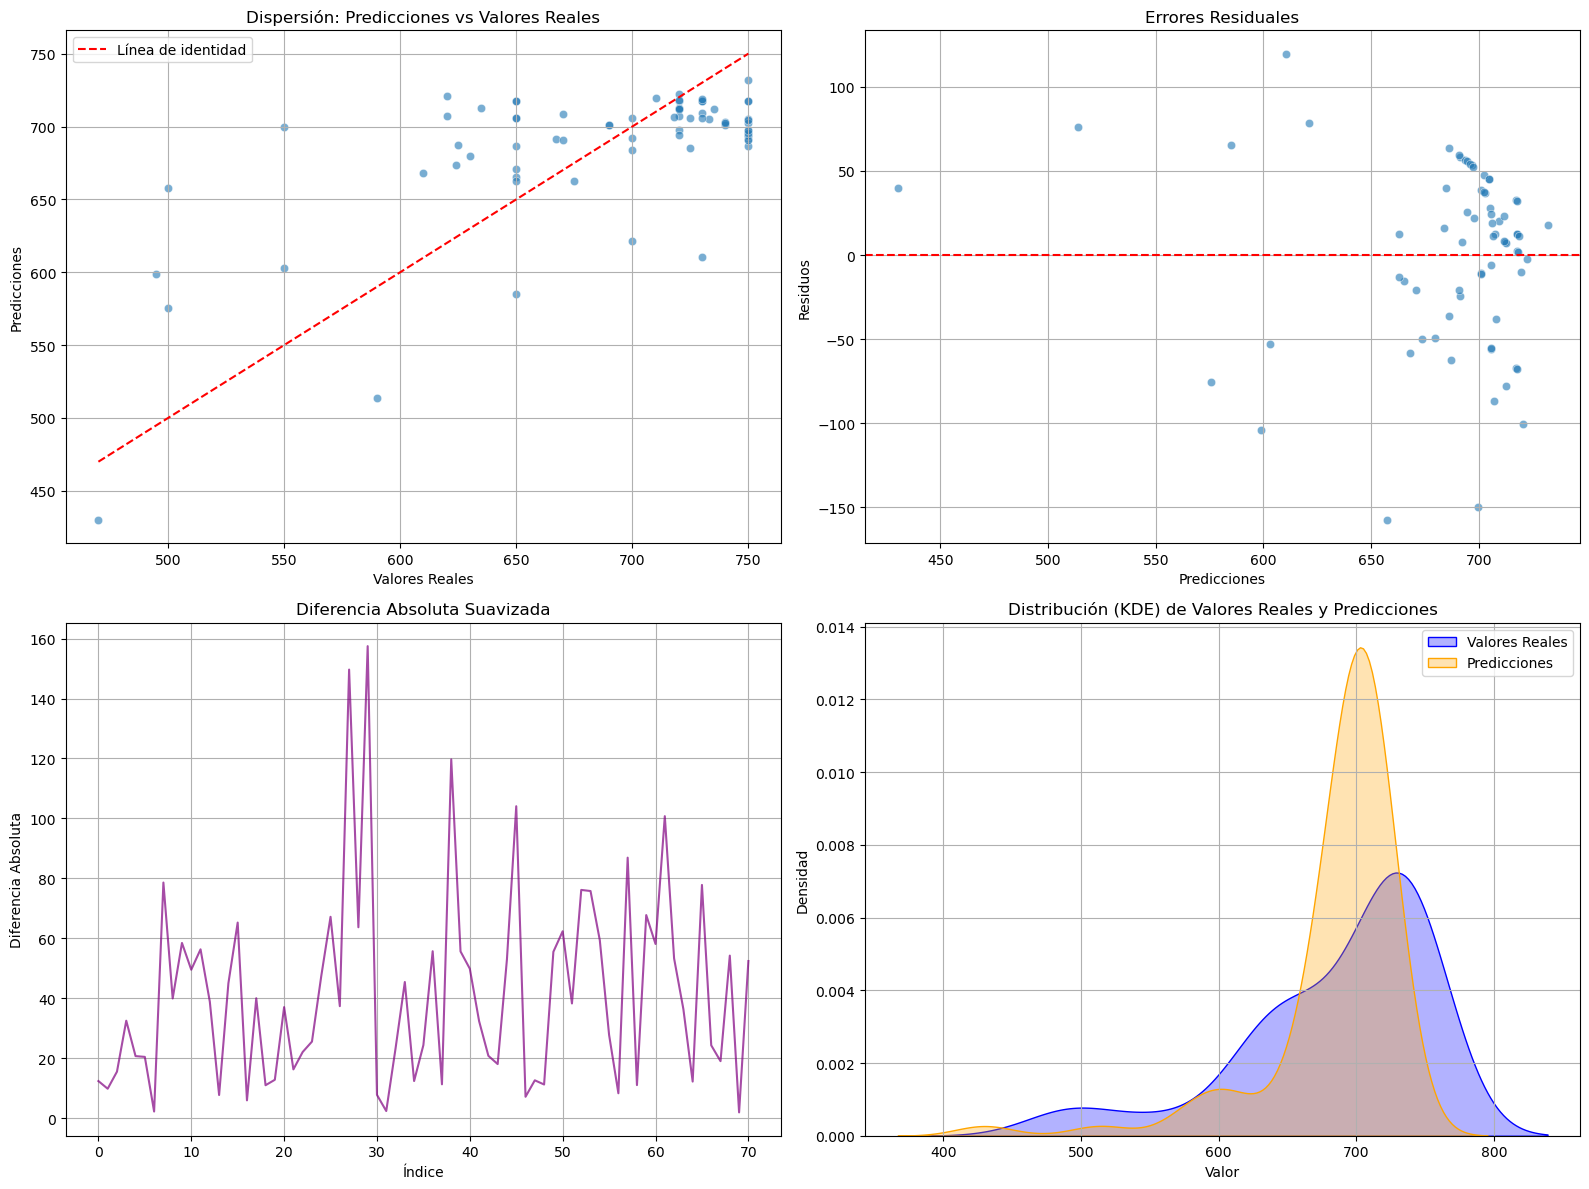

In [30]:
sp.comparativa_graficos(y_test, y_test_pred)

### PROBAMOS A MEJORAR EL MODELO ELIMINANDO VARIABLES CON POCA REPERCUSIÓN

Calculamos la correlación de las variables con "price" para ver cuales pueden ser eliminadas por no ser representativas en el modelo

Correlaciones con 'Precio':
Precio               1.000000
Provincia            0.536239
Tiene 360            0.176591
Habitaciones         0.107024
Baños                0.105857
Tiene Plano          0.083271
Tiene Video          0.081027
Mostrar Dirección    0.046862
Tipo de Propiedad    0.036378
Ascensor             0.030791
Exterior             0.028026
Tamaño_robust       -0.076692
Distancia_robust    -0.516021
Name: Precio, dtype: float64


c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\2-Modeling\../../src\support_modeling.py:377: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


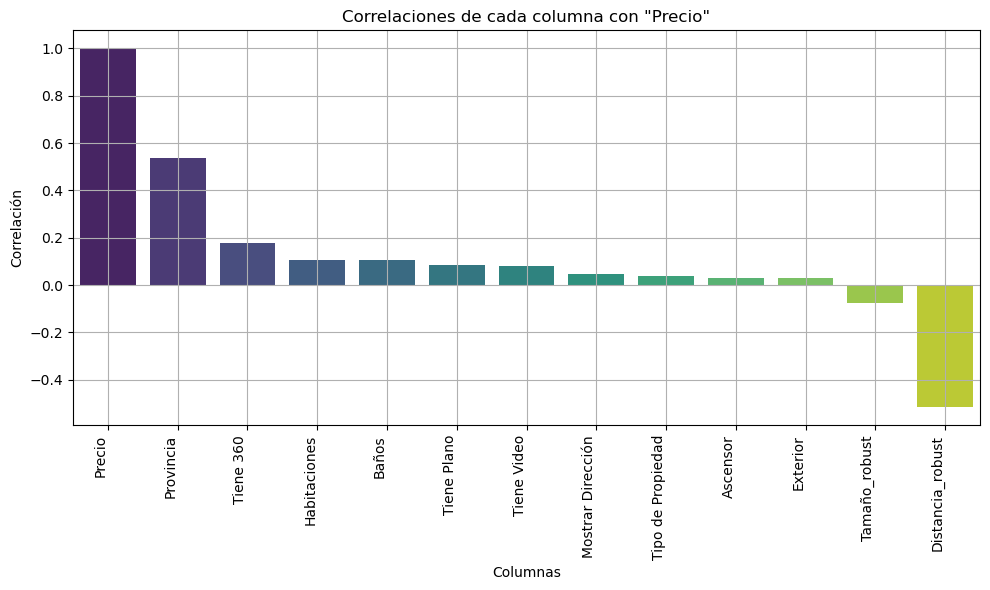


Columnas con baja correlación (abs < 0.05):
['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']


['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']

In [31]:
sp.analizar_correlaciones(df, "Precio", threshold=0.05)

In [32]:
# Excluir columnas irrelevantes según el análisis previo
columns_to_exclude = ['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']
df_filtered = df.drop(columns=columns_to_exclude)

In [33]:
# Definir las características (X) y la variable objetivo (y)
x2 = df_filtered.drop(columns=['Precio'])
y2 = df_filtered['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [35]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Configurar el GridSearch
model_GradientBoostingRegressor2 = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  # Validación cruzada más robusta
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

model_GradientBoostingRegressor2.fit(x_train2, y_train2)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
# Predecir en los datos de prueba
y_pred_test2 = model_GradientBoostingRegressor2.predict(x_test2)
y_pred_train2 = model_GradientBoostingRegressor2.predict(x_train2)
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.743300,30.782600,1503.986300,38.781300,11.206400
Test,0.414100,41.540000,2782.177700,52.746400,11.206400
Diferenceia Train-Test,0.329200,-10.757400,-1278.191400,-13.965100,0.000000
Porcentaje diferencia (%),79.497700,-34.946400,-84.986900,-36.009900,0.000000
Media,683.535700,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.084663,5.290331,313.528906,6.695166,1.639475
Influencia dif media (%),0.048200,1.573800,186.997000,2.043100,0.000000
Mediana,710.000000,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.081507,5.093141,301.842535,6.445613,1.578366
Influencia dif mediana (%),0.046400,1.515100,180.027000,1.966900,0.000000


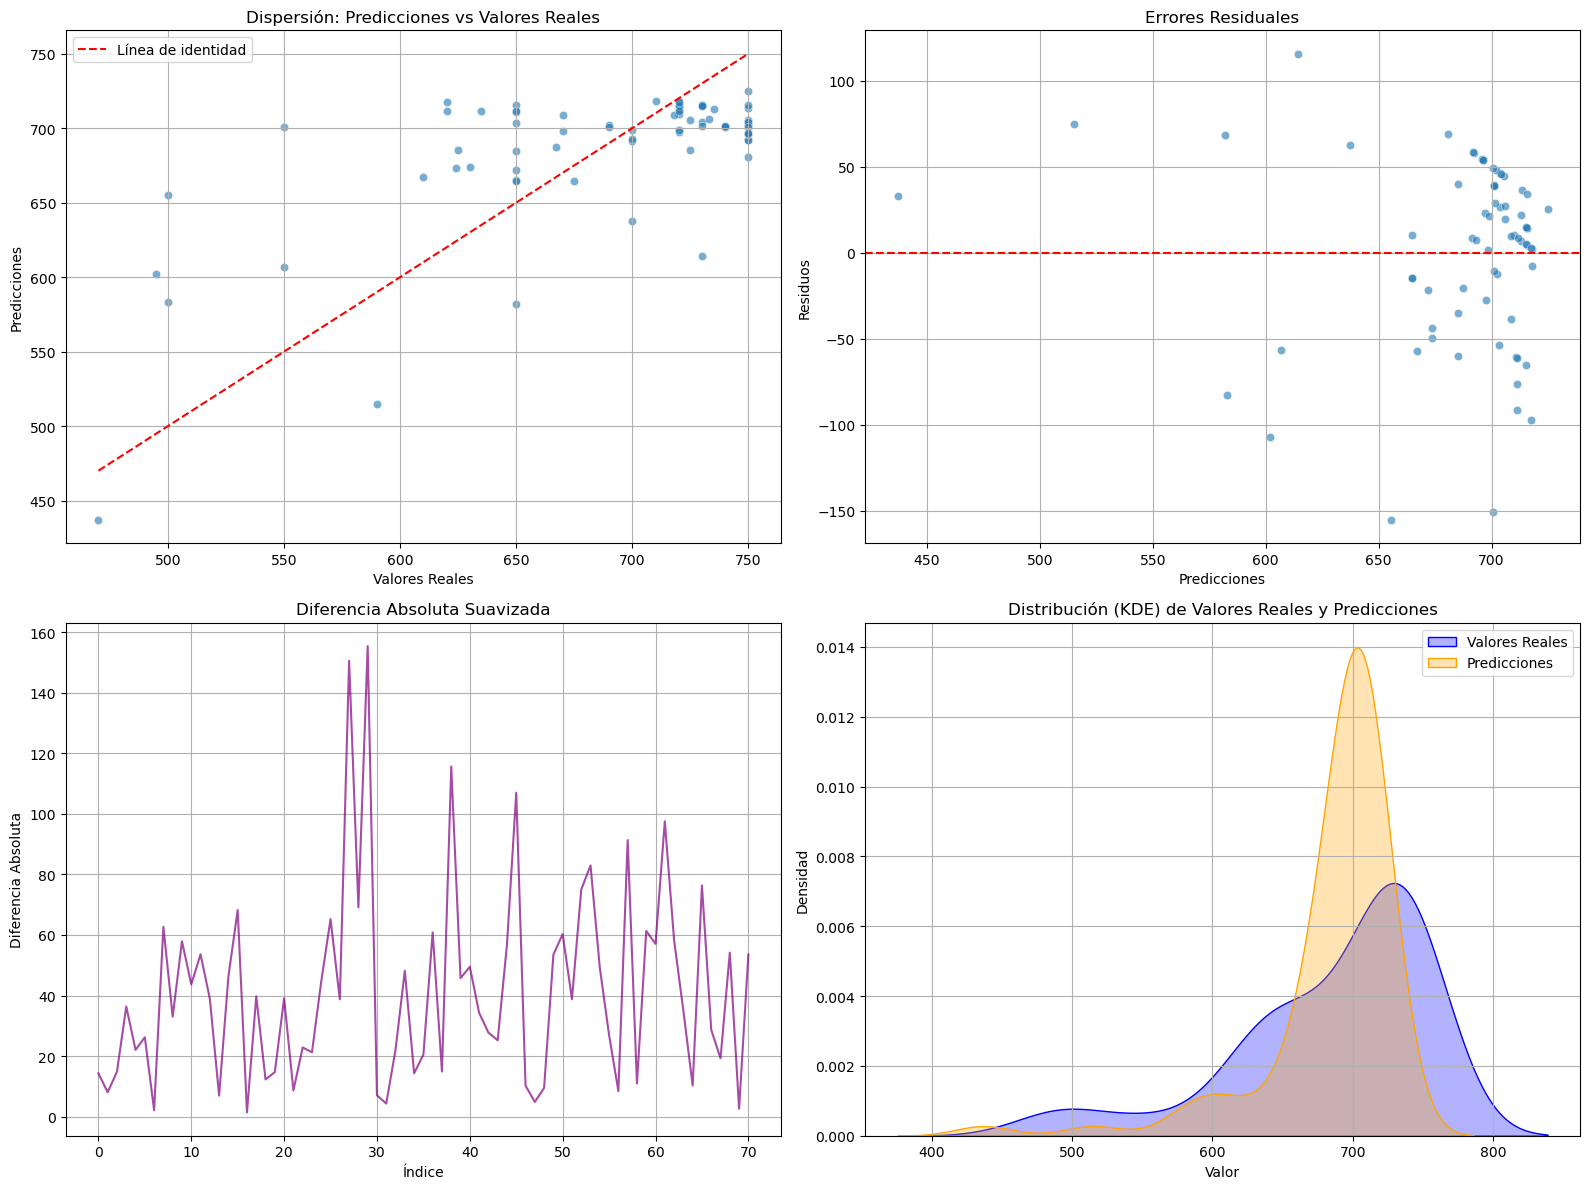

In [37]:
sp.comparativa_graficos( y_test2, y_pred_test2)

#### COMPARATIVA DE METRICAS

In [38]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.776900,28.265500,1307.379800,36.157700,11.285000
Test,0.404800,41.876800,2826.175600,53.161800,11.285000
Diferenceia Train-Test,0.372100,-13.611300,-1518.795800,-17.004100,0.000000
Porcentaje diferencia (%),91.921900,-48.155200,-116.171000,-47.027600,0.000000
Media,683.535700,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.086440,5.130844,302.365729,6.533638,1.650974
Influencia dif media (%),0.054400,1.991300,222.197000,2.487700,0.000000
Mediana,710.000000,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.083218,4.939599,291.095451,6.290106,1.589437
Influencia dif mediana (%),0.052400,1.917100,213.914900,2.394900,0.000000


In [39]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.743300,30.782600,1503.986300,38.781300,11.206400
Test,0.414100,41.540000,2782.177700,52.746400,11.206400
Diferenceia Train-Test,0.329200,-10.757400,-1278.191400,-13.965100,0.000000
Porcentaje diferencia (%),79.497700,-34.946400,-84.986900,-36.009900,0.000000
Media,683.535700,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.084663,5.290331,313.528906,6.695166,1.639475
Influencia dif media (%),0.048200,1.573800,186.997000,2.043100,0.000000
Mediana,710.000000,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.081507,5.093141,301.842535,6.445613,1.578366
Influencia dif mediana (%),0.046400,1.515100,180.027000,1.966900,0.000000


In [40]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_GradientBoostingRegressor2.pkl', 'wb') as file:
    pickle.dump(model_GradientBoostingRegressor2, file)